In [1]:
#@title Hidden Markov Model DS8004 


import os

os.listdir()

['.ipynb_checkpoints',
 '1.png',
 'e1.png',
 'e2.png',
 'e3.png',
 'e3_2.png',
 'e4.png',
 'e5.png',
 'e6.png',
 'Ensemble_Learners (1).ipynb',
 'Final_Sample_Questions.ipynb',
 'Hidden Markov Model.ipynb',
 'HMM Task2 & Prob2-Copy1.ipynb',
 'HMM Task2 & Prob2.ipynb',
 'hmm2.png',
 'hmm3.png',
 'HMM_Andy.ipynb',
 'Naive_Bayes_roger.ipynb',
 'SOLUTION_of_Final_Sample (1).ipynb',
 'test.txt']

In [2]:
import numpy as np
np.random.seed(42)

# Markov Model

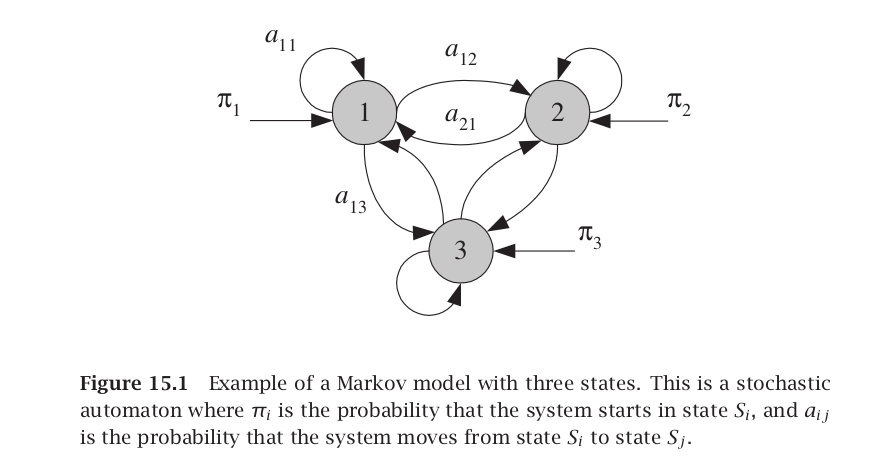

In [3]:
from IPython.display import Image
Image(filename='1.png')

Satisfying $\Sigma_{i=1}^{N} \pi_{i}$

* We have an observation sequence O that is the state sequence $Q =\{ q_{1} q_{2} ... q_{T} \}$, whose probability is given as

$$ P(O=Q|A,\Pi )$$ $$= P(q_{1}) \Pi_{t=2}^{T} P(q_{t}|q_{t-1}) $$

* Where $\Pi$  is a vector of N elements that sum to 1 
* A is the transition matrix that keeps the probability of transition from $S_{i}$  to $S_{j}$


In [4]:
# initial state probabilities
PI= [0.5, 0.2, 0.3] 

In [5]:
# transition matrix A
A=np.array([ [0.4, 0.3, 0.3],
    [0.2, 0.6, 0.2],
    [0.1, 0.1, 0.8]
  ])

* Given $\Pi$ and A, it is easy to generate K random sequences each of length T . 

* Let us see how we can calculate the probability of a sequence O = {S0 , S0 , S2 , S2 }. 
* Its probability

$$ P=(O |A ,\Pi) = P(S_{0})  \cdot P(S_{0} | S_{0}) \cdot P(S_{2} | S_{0})  \cdot P(S_{2} | S_{2}) \cdot  $$ 
$$\pi_{0} \cdot a_{00}\cdot a_{02}\cdot a_{22} $$
$$ 0.5 \cdot 0.4 \cdot 0.3 \cdot 0.8 = 0.048  $$

In [6]:
PI[0] * A[0,0] * A [0,2] * A[2,2]

0.048

In [7]:
'''
Lets compute S0S1S1S2S0S1S1
'''

PI[0] * A[0,1] * A [1,1] * A[1,2]* A[2,0] * A[0,1]* A[1,1]



0.000324

In [8]:
seq='S0S1S1S2S0S1S1'
seq=seq.split('S')
print(seq)

['', '0', '1', '1', '2', '0', '1', '1']


In [9]:
tr=list(zip(seq, seq[1:]))
tr

[('', '0'),
 ('0', '1'),
 ('1', '1'),
 ('1', '2'),
 ('2', '0'),
 ('0', '1'),
 ('1', '1')]

In [10]:
'''
Let define a function
It takes string and compute P
input:S0S1S1S2S0S1S1
'''
def probSeq(seq, sep='S'):
  seq=seq.split(sep)
  tr=list(zip(seq, seq[1:]))
  result=1
  for e in tr:
    if e[0]=='':
     result*=PI[int(e[1])]
    else:
     result*=A[int(e[0]), int(e[1])]
  return result

In [11]:
probSeq('S0S1S1S2S0S1S1')

0.000324

In [12]:
seq='S0S2'
probSeq(seq)

0.15

In [13]:
# Alternative Solution
# dropping S, we expect like 010002233
def probSeqAlt(prev,seq):
 if len(seq)==0:
  return 1
 elif prev=='':
  return PI[int(seq[0])]  * probSeqAlt(seq[0], seq[1:]) 
 else:
  return A[int(prev) , int(seq[0])] * probSeqAlt(seq[0], seq[1:])

In [14]:
probSeqAlt('','0112011')

0.000324

# Learning Parameters for Markov Model

$$ \hat{\pi}_{i}   =\frac{ \#(seq- starts- with S_{i})}{ \# seq}  $$


$$ \hat{a_{ij}} = \frac{\# transition: S_{i} \rightarrow S_{j} } {\# transition: S_{i} \rightarrow * }  $$

In [15]:
import nltk
from nltk.corpus import brown

In [16]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\roger\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [17]:
words=brown.words()
len(words)

1161192

In [18]:
words2=[e.lower() for e in words]
fd=nltk.FreqDist(words2)
fd.most_common(15)


[('the', 69971),
 (',', 58334),
 ('.', 49346),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('``', 8837),
 ("''", 8789)]

In [19]:
words3=list(set(w for w in words2 if len(w)>1 and fd[w]>10 and w.isalnum()))
len(words3)

7667

In [20]:
letters=[]
for w in words3:
 for c in w:
   if c not in letters:
    letters.append(c)

In [21]:
print(letters)

['e', 'q', 'u', 'i', 'v', 'a', 'l', 'n', 't', 'p', 'r', 's', 'c', 'm', 'o', 'y', 'd', 'x', 'b', 'k', 'w', 'g', 'h', 'f', 'z', '2', '3', '4', '1', '9', '7', 'j', '6', '0', '5', '8']


Lets Estimate $\hat{\pi}$ as
$$ \hat{\pi}_{i}   =\frac{ \#(seq-starts-with S_{i})}{ \# seq}  $$

recall that our simple example has PI  as

PI= [0.5, 0.2, 0.3] 

Now we estimate this

In [22]:
SIZE= len(words3)
SIZE

7667

In [23]:
# to find index
STATE_SIZE=len(letters)
print(STATE_SIZE)


36


In [24]:
print(letters.index('v'))

4


In [25]:
PI= np.zeros(len(letters), dtype="float64")
for w in words3:
 PI[letters.index(w[0])] +=1
print(PI)
PI= PI/sum(PI)

[370.  29.  99. 291. 110. 546. 269. 152. 400. 631. 446. 876. 780. 381.
 179.  32. 460.   0. 357.  56. 223. 203. 252. 366.   3.  13.   7.   5.
  44.   1.   3.  77.   2.   0.   2.   2.]


In [26]:
PI

array([0.04825877, 0.00378244, 0.01291248, 0.03795487, 0.0143472 ,
       0.0712143 , 0.03508543, 0.01982522, 0.05217164, 0.08230077,
       0.05817138, 0.1142559 , 0.10173471, 0.04969349, 0.02334681,
       0.00417373, 0.05999739, 0.        , 0.04656319, 0.00730403,
       0.02908569, 0.02647711, 0.03286814, 0.04773705, 0.00039129,
       0.00169558, 0.000913  , 0.00065215, 0.00573888, 0.00013043,
       0.00039129, 0.01004304, 0.00026086, 0.        , 0.00026086,
       0.00026086])

Lets Estimate transition matrix A as 

$$ \hat{a_{ij}} = \frac{\# transition: S_{i} \rightarrow S_{j} } {\# transition: S_{i} \rightarrow * }  $$


In [27]:
A= np.zeros((STATE_SIZE, STATE_SIZE))


In [28]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
W=list('hello')
print(W)

bi=list(zip(W,W[1:]))
print(bi)


['h', 'e', 'l', 'l', 'o']
[('h', 'e'), ('e', 'l'), ('l', 'l'), ('l', 'o')]


In [30]:
for word in words3:
  W= list(word)
  bi=list(zip(W,W[1:]))
  for p in bi:
   i=letters.index(p[0])
   j=letters.index(p[1])
   A[i,j]+= 1

In [31]:
print(letters)
A

['e', 'q', 'u', 'i', 'v', 'a', 'l', 'n', 't', 'p', 'r', 's', 'c', 'm', 'o', 'y', 'd', 'x', 'b', 'k', 'w', 'g', 'h', 'f', 'z', '2', '3', '4', '1', '9', '7', 'j', '6', '0', '5', '8']


array([[163.,  31.,  13., ...,   0.,   0.,   0.],
       [  0.,   0.,  87., ...,   0.,   0.,   0.],
       [ 86.,   0.,   1., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   9.,   0.,   0.],
       [  0.,   0.,   0., ...,   4.,   1.,   1.],
       [  0.,   0.,   0., ...,   2.,   0.,   0.]])

In [32]:
rowSum=np.sum(A,1)

In [33]:
rowSum

array([5.547e+03, 8.700e+01, 1.603e+03, 4.306e+03, 6.570e+02, 3.931e+03,
       2.289e+03, 3.212e+03, 3.268e+03, 1.526e+03, 3.448e+03, 2.627e+03,
       2.226e+03, 1.345e+03, 3.232e+03, 2.230e+02, 1.268e+03, 1.530e+02,
       7.630e+02, 2.840e+02, 4.470e+02, 8.660e+02, 1.013e+03, 7.370e+02,
       7.200e+01, 1.500e+01, 8.000e+00, 1.500e+01, 4.700e+01, 3.100e+01,
       3.000e+00, 1.180e+02, 5.000e+00, 1.100e+01, 1.400e+01, 2.000e+00])

In [34]:
B=(A.T/rowSum).T

In [35]:
rowSumB=np.sum(B,1)
rowSumB

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [36]:
A=B
np.round(A,2)

array([[0.03, 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.82, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.29, 0.07, 0.07],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ]])

In [37]:
print(list(zip(letters, np.round(A[0,:],2))))

[('e', 0.03), ('q', 0.01), ('u', 0.0), ('i', 0.01), ('v', 0.02), ('a', 0.07), ('l', 0.06), ('n', 0.14), ('t', 0.04), ('p', 0.02), ('r', 0.16), ('s', 0.14), ('c', 0.05), ('m', 0.03), ('o', 0.01), ('y', 0.01), ('d', 0.15), ('x', 0.02), ('b', 0.0), ('k', 0.0), ('w', 0.01), ('g', 0.01), ('h', 0.0), ('f', 0.01), ('z', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('1', 0.0), ('9', 0.0), ('7', 0.0), ('j', 0.0), ('6', 0.0), ('0', 0.0), ('5', 0.0), ('8', 0.0)]


In [38]:
PI

array([0.04825877, 0.00378244, 0.01291248, 0.03795487, 0.0143472 ,
       0.0712143 , 0.03508543, 0.01982522, 0.05217164, 0.08230077,
       0.05817138, 0.1142559 , 0.10173471, 0.04969349, 0.02334681,
       0.00417373, 0.05999739, 0.        , 0.04656319, 0.00730403,
       0.02908569, 0.02647711, 0.03286814, 0.04773705, 0.00039129,
       0.00169558, 0.000913  , 0.00065215, 0.00573888, 0.00013043,
       0.00039129, 0.01004304, 0.00026086, 0.        , 0.00026086,
       0.00026086])

In [39]:
'''
'''
def probWordBrown(prev,seq):
 if len(seq)==0:
  return 1
 elif prev=='':
  return PI[letters.index(seq[0])]  * probWordBrown(seq[0], seq[1:]) 
 else:
  return A[letters.index(prev) , letters.index(seq[0])] * probWordBrown(seq[0], seq[1:])

In [40]:
probWordBrown('', 'computer')

2.1744081195825023e-08

In [41]:
# the most probable words
for w in words3:
  pw=probWordBrown('',w)
  if pw>0.01:
    print(w, pw)

an 0.010181234751265778
di 0.013295951883589755
me 0.01263581719172061
at 0.01103269032654957
de 0.02148171585462544
pa 0.010894335154269606


In [42]:
# the most probable words, modification
import math
def probWordBrown2(w):
 return probWordBrown('',w) * math.pow(2,len(w))

for w in words3:
  pw=probWordBrown2(w)
  if pw>0.02:
    print(w, pw)

in 0.03825456164156759
an 0.04072493900506311
le 0.030226505053088184
ma 0.036946833893919916
we 0.02368499297812847
per 0.020048250841808578
al 0.03652200935685375
so 0.025747808882773622
on 0.024560382867555047
di 0.05318380753435902
tin 0.025487272453592714
me 0.05054326876688244
at 0.04413076130619828
ed 0.0295799211495237
he 0.034782469863858016
sin 0.028405947498306067
be 0.033442502898757095
de 0.08592686341850175
pa 0.04357734061707842


In [43]:
probWordBrown2('juwzjklyutus')

0.0

In [44]:
probWordBrown2('jkjlsajkjslasas')

0.0

In [45]:
probWordBrown2('computer')

5.566484786131206e-06

In [46]:
start='a'
i=letters.index(start)
j=np.argmax(A[letters.index(start),:])
i,j, letters[j]

(5, 8, 't')

In [47]:
start='d'
newword=start
i=letters.index(start)

for count in range(75):
 j=np.argmax(A[i,:])
 newword+=letters[j]
 i=j

newword

'dererererererererererererererererererererererererererererererererererererere'

In [48]:
for s in letters:
 start=s
 newword=start
 i=letters.index(start)
 for count in range(5):
  j=np.argmax(A[i,:])
  newword+=letters[j]
  i=j
 print(newword)



ererer
qurere
urerer
ingere
verere
atinge
lerere
ngerer
tinger
perere
rerere
stinge
conger
merere
ongere
yerere
derere
xperer
blerer
kerere
wating
gerere
herere
finger
zerere
200000
300000
400000
194000
940000
7tinge
jurere
600000
000000
500000
800000


## TASK-1
* We produced random words of 6 letters
* The task is to change this so that the model can learn how to stop.
> *  We need to add END sign to the end of each word to learn ending and stop producing letter. 
> * You can use $ sign to indicate the end of the word that is not in our letter list. 

* But since the model takes the most probable transiton using transition matrix, it cannot stop when it gets into a loop such as 'dererere' . 

* So we need to chage the model so that it really works as a probabilistic model. Each time, we need to randomize the decision with the probability of the next states, rather than moving to the most probable state.

* E.g., given that next state probabilites are  **(e:0.5, z: 0.2, p:0.3 )**, the model can randomly choose next letter(state) with the probabilities of 0.5, 0.2, 0.3 respectively. We can give a chance to the model to move the **z**  and **p** as well. You can find a suitable python function for this randomization.


In [49]:
# your code is here


# Hidden Markov Model


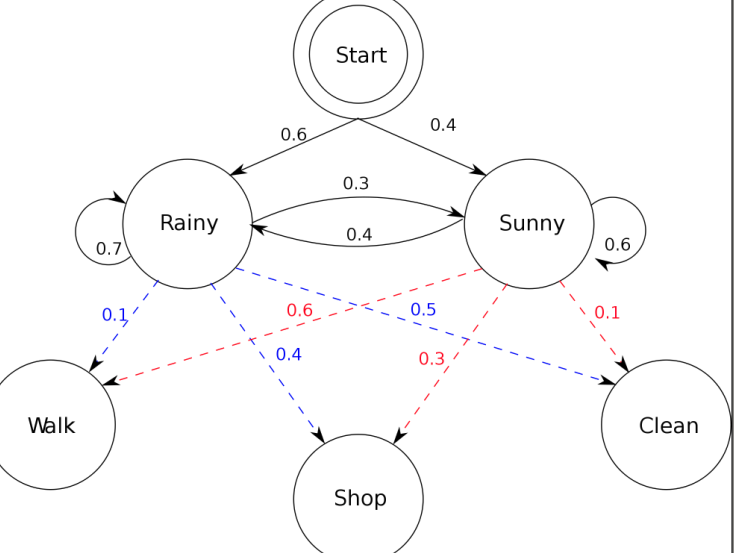

In [50]:
Image(filename='hmm3.png')

**Hidden States** : $S={S1,S2,.., S_{N}}$

S={Rainy, Sunny} , N=2

**Observables**   $V: {V1, V2,.., V_{M}}$

V= {Walk, Shop, Clean}, M=3

**State Transition**
$A=[a_{ij}]  = P(q_{t+1}= S_{j} |q_{t} = S_{i}) $ , NxN, 2x2

**Observation Or Emmision Probabilities ** 
$B=[b_{j}(m)] = P(O_{t}= V_{m} |q_{t} =S_{j}) $

**Initial State Probabilities**

$ \Pi = [\pi_{i}] = P(q1= S_{i}) $

In [51]:
V= ['W', 'S', 'C']
A=np.array(
   [[0.7, 0.3],
   [0.6, 0.4]] )
N=A.shape[0]

B=np.array(
   [[0.1, 0.4, 0.5],
   [0.6, 0.3, 0.1]])
M=B.shape[1]

PI=[0.6, 0.4]


## Problem 1:  Observation sequence probability
Given a model $\lambda$ , what is the probability of any given observation sequence, $O={O_{1}O_{2}...O_{T}}$, T is the length of Sequence and time length


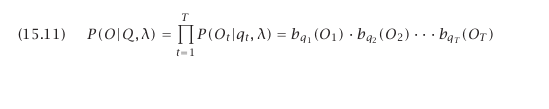

In [52]:
Image('e1.png')


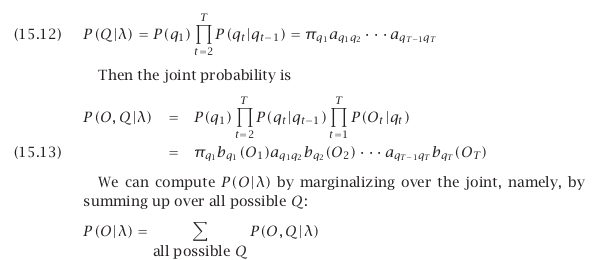

In [53]:
Image('e2.png')

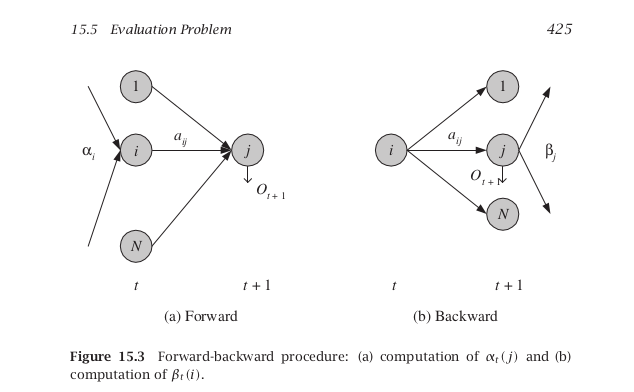

In [54]:
Image('e4.png')

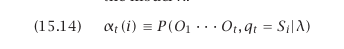

In [55]:
Image('e3.png')

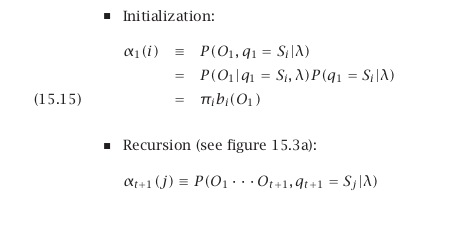

In [56]:
Image('e3_2.png')

$\alpha_{t+1}(j)=?$

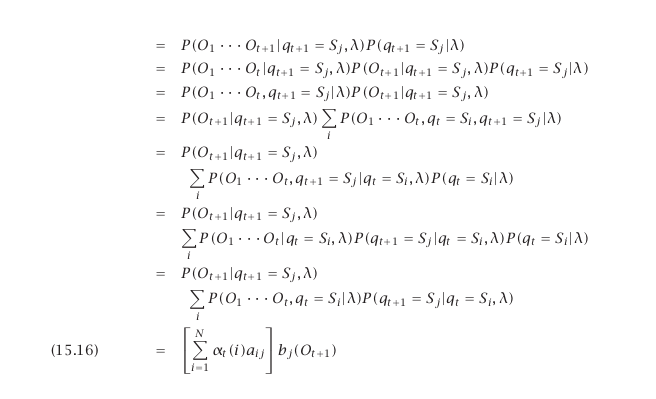

In [57]:
Image('e5.png')

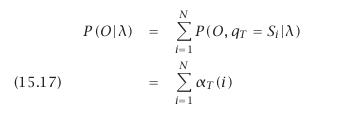

In [58]:
Image('e6.png')

What is the possibilty of observation sequence 'CSCCWW'

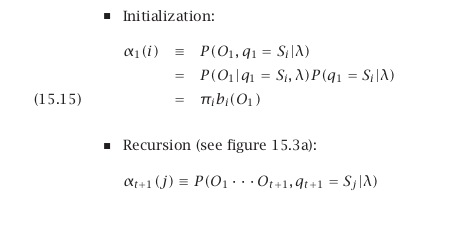

In [59]:
Image('e3_2.png')

In [60]:
Obs='CSCCWW'

In [61]:
PI

[0.6, 0.4]

In [62]:
B

array([[0.1, 0.4, 0.5],
       [0.6, 0.3, 0.1]])

In [63]:
V

['W', 'S', 'C']

In [64]:
len(B[:,V.index(Obs[0])])

2

In [71]:
T=len(Obs)
alpha=np.zeros((T,N))
alpha[0,:]= PI * B[:,V.index(Obs[0])]

In [72]:
alpha

array([[0.3 , 0.04],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.  ]])

The recursive formula is 
$$ \alpha_{t+1}(j)= [ \sum_{i=1}^{N} \alpha_{t}(i)\cdot a_{ij}] \cdot b_{j}(O_{t+1})  $$


In [77]:
 t=0
 j=0
 alpha[t+1,j] =  np.dot(alpha[t,:],A[:,j]) * B[j, V.index(Obs[t+1])]

In [79]:
alpha

array([[0.3   , 0.04  ],
       [0.0936, 0.    ],
       [0.    , 0.    ],
       [0.    , 0.    ],
       [0.    , 0.    ],
       [0.    , 0.    ]])

In [80]:
np.round(alpha,4)

array([[0.3   , 0.04  ],
       [0.0936, 0.    ],
       [0.    , 0.    ],
       [0.    , 0.    ],
       [0.    , 0.    ],
       [0.    , 0.    ]])

$P(O|\lambda)  =   \sum_{i=1}^{N} \alpha_{T}(i)   $

0.0

In [ ]:
t=0
#c=[]
norm=1
for t in range(len(Obs)-1):
 #norm=sum(alpha[t,:])
 #c.append(norm)
 alpha[t,:] = alpha[t,:] / norm
 for j in range(N):
  alpha[t+1,j] =  np.dot(alpha[t,:],A[:,j]) * B[j, V.index(Obs[t+1])]

#norm=sum(alpha[t+1,:])
#c.append(norm)
alpha[t+1,:] = alpha[t+1,:] /norm

In [92]:
np.round(sum(alpha[T-1,:]),4)

0.0

## TASK -2 

Clarify all scracthy code and define probability of observation function

$$ P(O | \lambda\{ A, B, \Pi\}) $$


In [98]:
# your code is here

def probObs(Obs,A, B, V, PI):
 T=len(Obs)
 N=A.shape[0]
 alpha=np.zeros((T,N))
 alpha[0,:]= PI * B[:,V.index(Obs[0])]
 t=0
 for t in range(len(Obs)-1):
  alpha[t,:] = alpha[t,:]
  for j in range(N):
  #this FOR seems to be converted into DOT
   alpha[t+1,j] =  np.dot(alpha[t,:],A[:,j]) * B[j, V.index(Obs[t+1])]
 return sum(alpha[T-1,:])


In [99]:
# test your code
assert np.round(probObs('CSCCWW', A, B, V, PI),4) ==  0.0013

* Using Beta

$\beta_{t}(i) = P(O_{t+1}.. O_{T} | q_{t}=S_{i}, \lambda) $

*Intial Condition*

$ \beta_{T}(i) =1 $

*Recursion*

$ \beta_{t}(i) = \sum_{j=1}^{N}  a_{ij} b_{j}(O_{t+1}) \beta_{t+1}(j) $

## Problem 2 Finding the State Sequence

$P(Q| O, \lambda)$

$\gamma_{t}(i) = P(q_{t}= S_{i} |O, \lambda )$

$=\frac{\alpha_{t} (i) \beta_{}t (i) }{ \sum_{j=1}^{N} \alpha_{t}(j) \beta_{t}{j} }$


To find the state sequence, for each time step t, we can choose the state
that has the highest probability:


$q_{t}* = argmax_{i} ( \gamma_{t} (i) )$



## Problem 3  Learning Model Parameters


* We now move on to the third problem, learning an HMM from data.
* The approach is maximum likelihood, and we would like to calculate λ* that maximizes the likelihood of the sample of training sequences, $X = \{O^{k}\}_{k=1}^{K} $
, namely, P (X|λ). 
* We start by defining a new variable that
will become handy later on.

$\xi_{t}(i,j)  \leftarrow P( q_{t}=S_{i}, q_{t+1}= S_{j} | O, \lambda$)
...

$\xi_{t}(i,j)  \leftarrow   \frac{\alpha_{t}(i)  a_{ij}  b_{j}(O_{t+1}) \beta_{t+1}(j) }{ \sum_{k} \sum_{l} \alpha_{t}(k) a_{kl}b_{l}(O_{t+1}) \beta_{t+1}(l) }$


$\gamma_{t}(i) = \sum_{j=1}^{N}  \xi_{t}(i,j) $



$\hat{a}_{ij} = \frac{ \sum_{t=1}^{T-1}\xi_{t}(i,j)}{ \sum_{t=1}^{T-1} \gamma_{t}(i)}  $


$\hat{b}_{j}(m) =  \frac{\sum_{t=1}^{T} \gamma_{t}(j) 1(O_{t}= v_{m})}{ \sum_{t=1}^{T} \gamma_{t}(j) }$


* We have the Baum-Welch algorithm, which is an EM procedure


$X=\{O^{k} \}_{k=1}^{K}$


$P(X|\lambda) = \Pi_{k=1}^{K} P(O^{k} |\lambda) $


* the parameters are now averages over all observations in all sequences:


$\hat{a}_{ij} = \frac{\sum_{k=1}^{K}  \sum_{t=1}^{T_{k}-1}\xi_{t}^{k}(i,j)}{  \sum_{k=1}^{K} \sum_{t=1}^{T_{k}-1} \gamma_{t}^{k}(i)}  $


$\hat{b}_{j}(m) =  \frac{\sum_{k=1}^{K} \sum_{t=1}^{T_{k}} \gamma_{t}^{k}(j) 1(O_{t}^{k}= v_{m})}{\sum_{k=1}^{K} \sum_{t=1}^{T_{k}} \gamma_{t}^{k}(j) }$


$ \hat{\Pi}_{i} = \frac{ \sum_{k=1}^{K} \gamma_{1}^{k}(i) }{K} $








In [100]:
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc

In [101]:
#!jupyter nbconvert --to PDF "Hidden Markov Model.ipynb"

# New Section